### Загрузка датасета

In [1]:
import numpy as np
import pandas as pd

In [2]:
emails = pd.read_csv('dataset/Emails.csv')
email_receivers = pd.read_csv('dataset/EmailReceivers.csv')
aliases = pd.read_csv('dataset/Aliases.csv')
persons = pd.read_csv('dataset/Persons.csv')

### Изучение датасета emails

In [11]:
emails.columns

Index([u'Id', u'DocNumber', u'MetadataSubject', u'MetadataTo', u'MetadataFrom',
       u'SenderPersonId', u'MetadataDateSent', u'MetadataDateReleased',
       u'MetadataPdfLink', u'MetadataCaseNumber', u'MetadataDocumentClass',
       u'ExtractedSubject', u'ExtractedTo', u'ExtractedFrom', u'ExtractedCc',
       u'ExtractedDateSent', u'ExtractedCaseNumber', u'ExtractedDocNumber',
       u'ExtractedDateReleased', u'ExtractedReleaseInPartOrFull',
       u'ExtractedBodyText', u'RawText'],
      dtype='object')

In [12]:
emails.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [37]:
emails.loc[0]

Id                                                                              1
DocNumber                                                               C05739545
MetadataSubject                                                               WOW
MetadataTo                                                                      H
MetadataFrom                                                    Sullivan, Jacob J
SenderPersonId                                                                 87
MetadataDateSent                                        2012-09-12T04:00:00+00:00
MetadataDateReleased                                    2015-05-22T04:00:00+00:00
MetadataPdfLink                 DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...
MetadataCaseNumber                                                   F-2015-04841
MetadataDocumentClass                                               HRC_Email_296
ExtractedSubject                                                          FW: Wow
ExtractedTo     

### Предобработаем тексты

Оставим признаки, которые считаем нужными. Удалим всякие даты, индексы и цифры. Конечно, можно оставить даты, чтобы посмотреть, как письма сгруппированы по времени, но это не слишком интеллектуально, и мне лень, поэтому, возможно, сделаю чуть позже.
Из признаков оставим: MetadataSubject, MetadataTo, MetadataFrom, ExtractedSubject, ExtractedTo, ExtractedFrom, ExtractedBodyText.

In [21]:
dataset = emails[['MetadataSubject', 'MetadataTo', 'MetadataFrom', 'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedBodyText']]
dataset.head()

,MetadataSubject,MetadataTo,MetadataFrom,ExtractedSubject,ExtractedTo,ExtractedFrom,ExtractedBodyText
0,WOW,H,"Sullivan, Jacob J",FW: Wow,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN
1,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,NaN,NaN,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest..."
2,CHRIS STEVENS,;H,"Mills, Cheryl D",Re: Chris Stevens,B6,"Mills, Cheryl D <MillsCD@state.gov>",Thx
3,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",FVV: Cairo Condemnation - Final,NaN,"Mills, Cheryl D <MillsCD@state.gov>",NaN
4,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,NaN,NaN,NaN,"H <hrod17@clintonemail.com>\nFriday, March 11,..."


In [13]:
print dataset.ExtractedBodyText[5]

Pis print.
-•-...-^
H < hrod17@clintonernailcom>
Wednesday, September 12, 2012 2:11 PM
°Russorv@state.gov'
Fw: Meet The Right-Wing Extremist Behind Anti-fvluslim Film That Sparked Deadly Riots
From [meat)
Sent: Wednesday, September 12, 2012 01:00 PM
To: 11
Subject: Meet The Right Wing Extremist Behind Anti-Muslim Film That Sparked Deadly Riots
htte/maxbiumenthal.com12012/09/meet-the-right-wing-extremist-behind-anti-musiim-tihn-that-sparked-
deadly-riots/
Sent from my Verizon Wireless 4G LTE DROID
U.S. Department of State
Case No. F-2015-04841
Doc No. C05739559
Date: 05/13/2015
STATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM.
SUBJECT TO AGREEMENT ON SENSITIVE INFORMATION & REDACTIONS. NO FOIA WAIVER. STATE-5CB0045251


Предобработаем колонку ExtractedBodyText, чтобы удалить лишнее

In [22]:
import math

def is_starts_with_trash(line, trash):
    for elem in trash:
        if line.startswith(elem):
            return True
    return False

def is_line_in_trash(line, trash):
    for elem in trash:
        if elem in line:
            return True
    return False

def clean(email):
    # Проверим на nan
    if email != email:
        return ""
    # Здесь будем хранить те паттерны начала строк, по которым строку можно удалить
    start_trash = {'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 
             'Sent from', 'U.S. Department of State', 'Case No.', 'Doc No.' 'Date:', 'STATE DEPT.', 
             'SUBJECT TO', 'Fw', 'From', 'Sent', 'To', 'Subject', 'H '}
    # Здесь будем хранить те паттерны, по которым строку можно удалить
    another_trash = {'@', '/', '\\', '\\x'}
    buf = filter(lambda line: not is_line_in_trash(line, another_trash), email.split('\n'))
    return "\n".join(filter(lambda line: not is_starts_with_trash(line, start_trash), buf))

dataset.ExtractedBodyText = dataset.ExtractedBodyText.apply(clean)

In [5]:
dataset.ExtractedBodyText[:20]

0                                                      
1     B6\nH: Latest How Syria is aiding Qaddafi and ...
2                                                   Thx
3                                                      
4     Huma Abedin\nhrc memo syria aiding libya 03031...
5               Pis print.\n-•-...-^\nDoc No. C05739559
6                                                      
7     Huma Abedin\nhrc memo Syria aiding libya 03031...
8                                                   FYI
9     B6\nLibya 37 sept 12 12.docx\nSending direct. ...
10                                         Fyi\nB6\n— —
11    B6\nLibya 37 sept 12 12.docx\nSending direct. ...
12                                                  Fyi
13    Anne-Marie Slaughter\npiece on libya nfz that ...
14    _ .....\nIncluding mine. Her remarks were real...
15    I asked to attend your svtc today with Embassy...
16                 Hope. See picture below Kamala sent.
17                                       Another

### Найдём самые популярные биграммы

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(2,2))
corpus = vect.fit_transform(dataset.ExtractedBodyText)
bigrams = corpus.sum(axis=0)

In [80]:
# Найдём биграммы с максимальной встречаемостью
max_num = bigrams.argmax()
for key in vect.vocabulary_.keys():
    if vect.vocabulary_[key] == max_num:
        print key

of the


### Выделим коллокации по PMI

In [23]:
# Немного преобразуем датасет, чтобы передать его в BigramCollocationFinder.
# Суть в том, что мы объединим все в единый текст. Да, тут могут проявиться такие ситуации, когда будет учитываться, что
# словосочетание будет состоять из последнего слова email, и первого слова следующего email. Но т.к. 
# мы ищем самые повторяющиеся коллокации, то это не важно.
import re

texts = dataset.ExtractedBodyText
united_text = np.array([])
for text in texts:
    united_text = np.append(united_text, re.split("\\s+", text))

In [24]:
import nltk
from nltk.collocations import *
import re

bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(united_text)
finder.nbest(bigram_measures.pmi, 10)

[('!-', '.112'),
 ('!.:tam', 'Trir...\xe2\x80\x9811'),
 ("!Dosi',.", '--;'),
 ('!act', 'davc'),
 ('"13', 'Bankers."The'),
 ('"9', 'pm"'),
 ('"Afghanistan:', 'Sustaining'),
 ('"Ashawntea?"', '"Historical'),
 ('"Back!', 'Back!"'),
 ('"Basic', 'Laws."')]

### Кластеризация

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vect = TfidfVectorizer(max_features=1000)
corpus = vect.fit_transform(dataset.ExtractedBodyText)
clusterizer = KMeans(n_clusters=3) # 3 выяснено опытным путём
y = clusterizer.fit_predict(corpus)

### Визуализация

Визуализируем это добро сначала без подписей

In [19]:
from sklearn.decomposition import PCA

X_pca = PCA(n_components=2).fit_transform(corpus.todense())

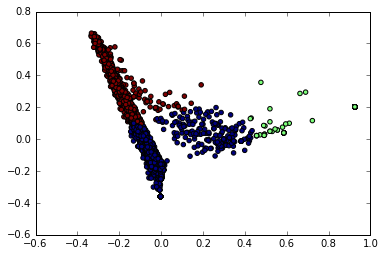

In [20]:
import matplotlib.pyplot as plt

% matplotlib inline

plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.show()

Вполне красивенько. Теперь попробуем визуализировать вместе с частыми словами. Получим порядка 20 самых популярных слов в TfdifVectorizer, выберем письма, в которых это слово встречается и выведем в центре этих писем.

In [30]:
feature_array = np.array(vect.get_feature_names())
tfidf_sorting = np.argsort(corpus.toarray()).flatten()[::-1]

top_n = feature_array[tfidf_sorting][:20]
top_n

array([u'below', u'see', u'your', u'family', u'financial', u'finally',
       u'final', u'fight', u'few', u'feel', u'federal', u'february',
       u'fear', u'fax', u'favorable', u'far', u'families', u'first',
       u'fall', u'failed'], 
      dtype='<U14')

In [57]:
texts = dataset.ExtractedBodyText

In [115]:
coordinates = {}
values = [[], []]
for word in top_n:
    ids = []
    for i in xrange(X_pca.shape[0]):
        if word in texts[i]:
            ids.append(i)
    word_x = 0.
    word_y = 0.
    for i in ids:
        word_x += X_pca[i, 0]
        word_y += X_pca[i, 1]
    word_x /= len(buf)
    word_y /= len(buf)
    coordinates[word] = (word_x, word_y)
    values[0].append(word_x)
    values[1].append(word_y)

In [116]:
coordinates

{u'below': (-0.0012254752835519583, 0.0021099092701150667),
 u'failed': (-0.00089487261922901562, 0.0016613795738895285),
 u'fall': (-0.0014249821391471074, 0.0026810587141790402),
 u'families': (-0.00068741676268420924, 0.0013094426365391663),
 u'family': (-0.0011821313767999737, 0.0020417946105809152),
 u'far': (-0.0023625874856484977, 0.0044445014207812085),
 u'favorable': (-0.00018482285668083579, 0.00033470699319230026),
 u'fax': (-0.00057618885092831744, 0.0004596933671317336),
 u'fear': (-0.0012259087467421923, 0.0023884985803127455),
 u'february': (0.0, 0.0),
 u'federal': (-0.00047547029514758766, 0.00092538976258270172),
 u'feel': (-0.0017159098063976024, 0.0030287674620595758),
 u'few': (-0.0026444933316379961, 0.004370342759159979),
 u'fight': (-0.0015327443905474411, 0.0029492103332744418),
 u'final': (-0.0016766344817698441, 0.0028640902744580159),
 u'finally': (-0.00069056752089081833, 0.0012844601665343138),
 u'financial': (-0.00092167082874261552, 0.0017940655060880277)

Они все располгаюатся близко к середине, так что это было плохой идеей :(

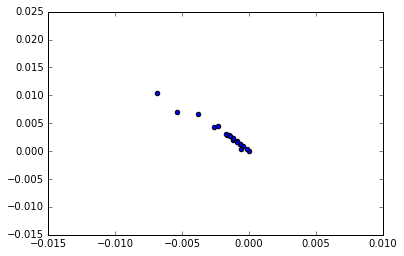

In [118]:
plt.figure()
plt.scatter(values[0], values[1])
plt.show()